<a href="https://colab.research.google.com/github/ManjuVijayakumar/ICTAK_DSA_June_25/blob/main/Assignment_of_Python_Flask_DSA_June_25_(Regression_beer_servings)_Manju_Vijayakumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# load the dataset
df= pd.read_csv('/content/sample_data/beer-servings.csv', index_col= 'Unnamed: 0')

# first 5 rows
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


Target variable: total_litres_of_pure_alcohol

In [ ]:
# reading last 5 rows
df.tail()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
188,Venezuela,NaN,100.0,3.0,7.7,South America
189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,Yemen,6.0,0.0,0.0,0.1,Asia
191,Zambia,32.0,19.0,4.0,2.5,Africa
192,Zimbabwe,64.0,18.0,4.0,4.7,Africa


In [ ]:
# Dataset information
print('Dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

Dataset has 193 rows and 6 columns


In [ ]:
# Dataset datatype detail
df.dtypes

,0
country,object
beer_servings,float64
spirit_servings,float64
wine_servings,float64
total_litres_of_pure_alcohol,float64
continent,object


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


In [ ]:
# Statistical analysis of dataset
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,185.000000,185.000000,187.000000,192.000000
mean,105.124324,83.221622,50.165775,4.741667
std,100.524714,89.142958,80.358868,3.767654
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,60.000000,9.000000,4.250000
75%,185.000000,132.000000,60.500000,7.200000
max,376.000000,438.000000,370.000000,14.400000


The average beer_servings around the world is 105.12 which is highest amount other alcoholic beverages.

In [ ]:
# Duplicate checking
df.duplicated().sum()

np.int64(0)

There are no duplicate detail available in the dataset

**Missing value analysis**

In [ ]:
df.isnull().sum()

,0
country,0
beer_servings,8
spirit_servings,8
wine_servings,6
total_litres_of_pure_alcohol,1
continent,0


There are missing values in beer_serving, spirit_servings and wine_servings

In [ ]:
df[(df.beer_servings == 0 ) | (df.wine_servings == 0) | (df.spirit_servings == 0)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
2,Algeria,25.0,0.0,14.0,0.7,Africa
19,Bhutan,23.0,0.0,0.0,0.4,Asia
27,Burundi,88.0,0.0,0.0,6.3,Africa
40,Cook Islands,0.0,254.0,74.0,5.9,Oceania
46,North Korea,0.0,0.0,0.0,0.0,Asia
55,Equatorial Guinea,92.0,0.0,233.0,5.8,Africa
56,Eritrea,18.0,0.0,0.0,0.5,Africa
58,Ethiopia,20.0,3.0,0.0,0.7,Africa
63,Gambia,8.0,0.0,1.0,2.4,Africa


The null values in these features means "not applicable" or "not served in these countries" (countries with alcohol bans). Hence these are structural missing values, not random missing data. Imputing these values will distort the data. Instead, it is treated as zero.

In [ ]:
# Target variable has 1 null value

df[df.total_litres_of_pure_alcohol.isnull()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
13,Bangladesh,NaN,NaN,NaN,NaN,Asia


In [ ]:
# Deleting the same
df = df.dropna(subset= ['total_litres_of_pure_alcohol'])
df[df.total_litres_of_pure_alcohol.isnull()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent


In [ ]:
# Replace missing numeric values (not served) with 0
df[['beer_servings', 'spirit_servings', 'wine_servings']] = df[['beer_servings', 'spirit_servings', 'wine_servings']].fillna(0)

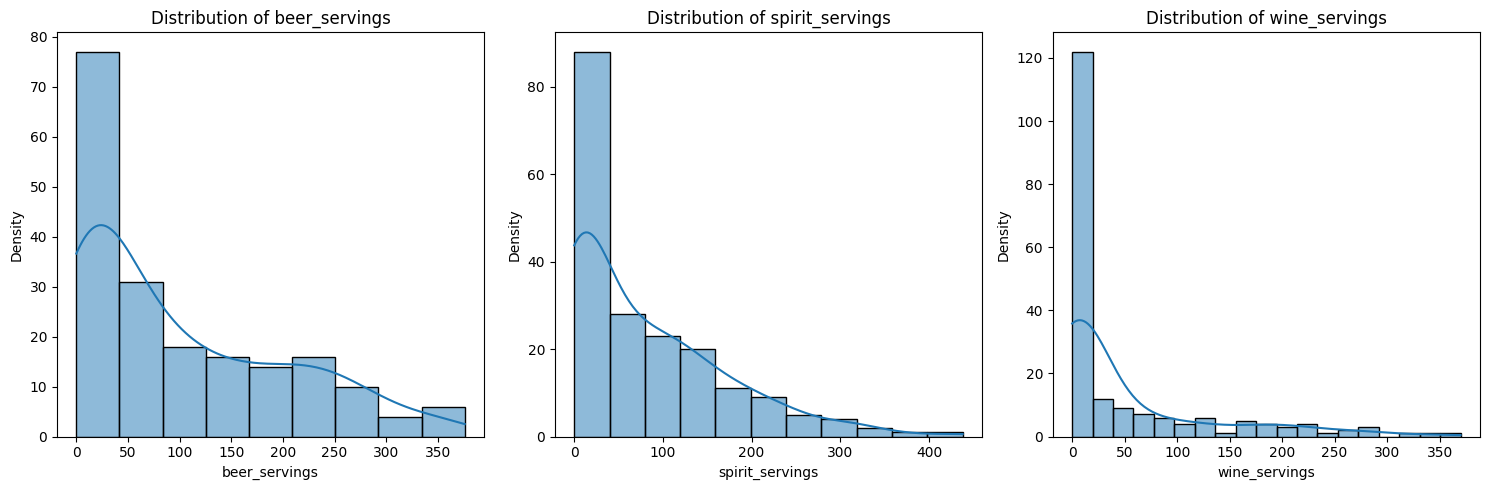

In [ ]:
# Distribution plot of numerical features
num_cols = ['beer_servings', 'spirit_servings', 'wine_servings']

fig, axes = plt.subplots(nrows=1, ncols=len(num_cols), figsize=(15, 5))

for i, col in enumerate(num_cols):
  sns.histplot(df[col], kde= True, ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

**Analyzing categorical variables**

In [ ]:
for col in df.select_dtypes(include= 'object').columns:
  print(col)
  print(df[col].nunique())

country
192
continent
6


In [ ]:
df_beer = df.sort_values(by='beer_servings', ascending= False).head(20)
df_spirit = df.sort_values(by='spirit_servings', ascending= False).head(20)
df_wine = df.sort_values(by='wine_servings', ascending= False).head(20)

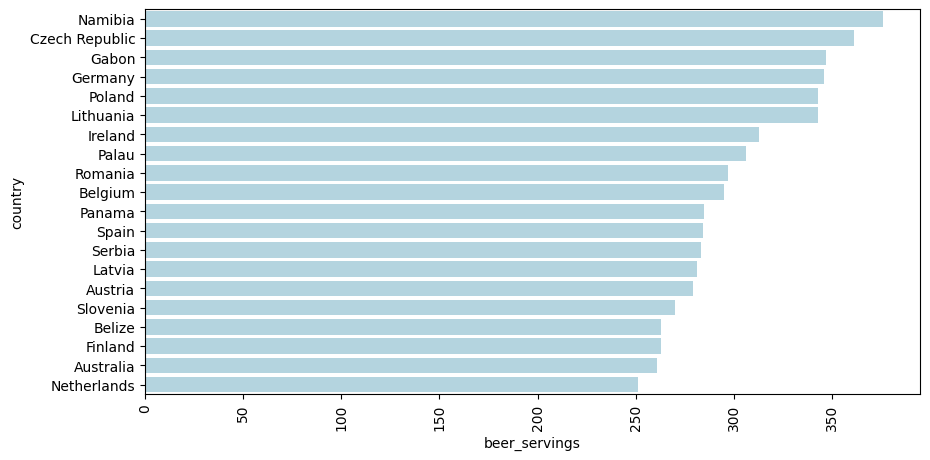

In [ ]:
plt.figure(figsize= (10,5))
sns.barplot(y= df_beer.country, x=df_beer.beer_servings, color= 'lightblue')
plt.xticks(rotation= 90)
plt.show()

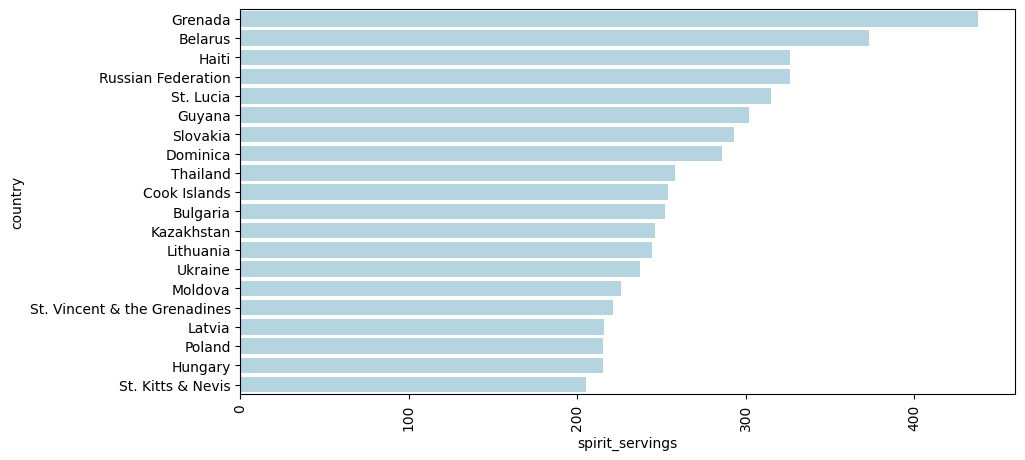

In [ ]:
plt.figure(figsize= (10,5))
sns.barplot(y= df_spirit.country, x=df_spirit.spirit_servings, color= 'lightblue')
plt.xticks(rotation= 90)
plt.show()

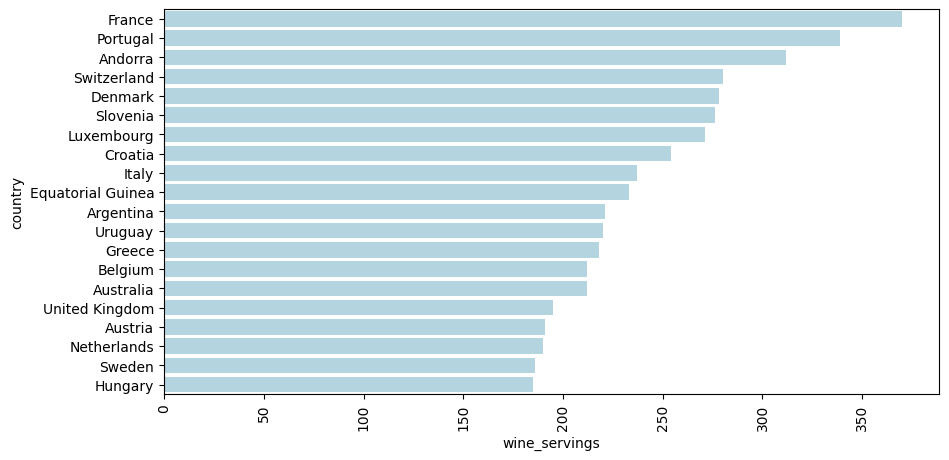

In [ ]:
plt.figure(figsize= (10,5))
sns.barplot(y= df_wine.country, x=df_wine.wine_servings, color= 'lightblue')
plt.xticks(rotation= 90)
plt.show()

Above barplot shows the top 20 countries with highest beer, spirit and wine servings

**Multivariate analysis - Correlation**

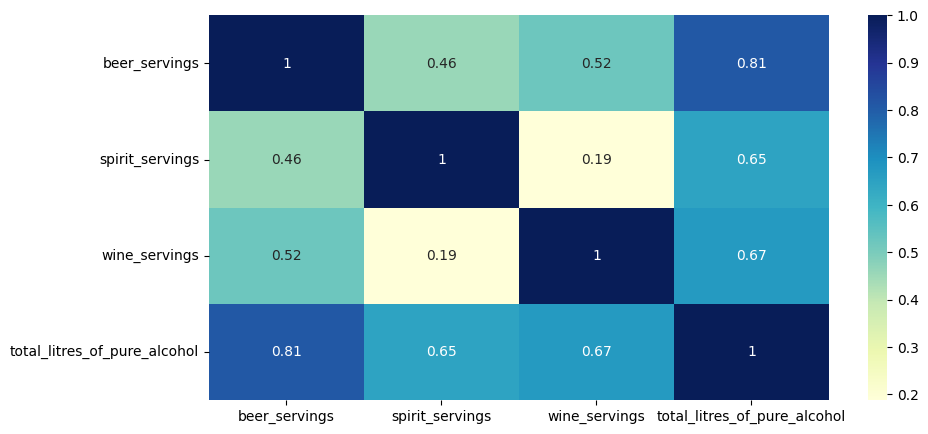

In [ ]:
numeric_cols= df.select_dtypes(include= ['int64', 'float64'])

plt.figure(figsize= (10, 5))
sns.heatmap(numeric_cols.corr(), annot= True, cmap= 'YlGnBu')
plt.show()

**Outlier Analysis**

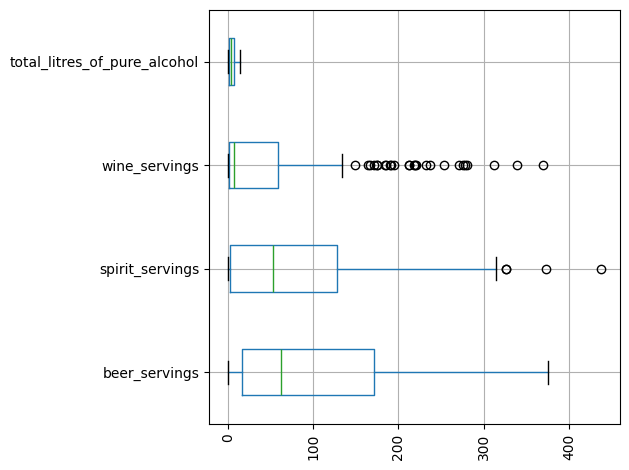

In [ ]:
numeric_cols.boxplot(vert= False)
plt.xticks(rotation= 90)
plt.tight_layout()
plt.show()

There are some outliers present in features wine_servings and spirit_servings.

**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Proceeding without considering the categorical variables country & continent

X= df.drop(['country','continent', 'total_litres_of_pure_alcohol'], axis= 1)
y= df.total_litres_of_pure_alcohol

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.20, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(153, 3) (39, 3) (153,) (39,)


In [ ]:
models = {
    'LinearRegression' : LinearRegression(),
    'Lasso' : Lasso(random_state= 42),
    'RandomForest' : RandomForestRegressor(n_estimators= 100, random_state= 42),
    'XGBRegressor' : XGBRegressor(random_state= 42)
}

In [ ]:
for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  r2_scr = r2_score(y_test,y_pred)

  print('Model : {}'.format(name))
  print('Mean Squared Error : {}'.format(mse))
  print('R2 Score : {}'.format(r2_scr))
  print('-' * 25)

Model : LinearRegression
Mean Squared Error : 1.290492184246054
R2 Score : 0.9232243491432632
-------------------------
Model : Lasso
Mean Squared Error : 1.2922604317569086
R2 Score : 0.9231191502469204
-------------------------
Model : RandomForest
Mean Squared Error : 1.2430960185897415
R2 Score : 0.9260441038932721
-------------------------
Model : XGBRegressor
Mean Squared Error : 1.3727607039695546
R2 Score : 0.9183299226415775
-------------------------


In [ ]:
# Linear Regression

lr= LinearRegression()
lr_model = lr.fit(X_train, y_train)

print(lr_model.score(X_train, y_train))
print(lr_model.score(X_test, y_test))

0.8259426767605947
0.9232243491432632


In [ ]:
# Lasso Regression

lasso= Lasso(random_state= 42)
lasso_model= lasso.fit(X_train, y_train)

print(lasso_model.score(X_train, y_train))
print(lasso_model.score(X_test, y_test))

0.8259221898892077
0.9231191502469204


In [ ]:
# Random Forest Regressor
rf= RandomForestRegressor(n_estimators= 100, random_state= 42)
rf_model= rf.fit(X_train, y_train)

print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))

0.9688787373338227
0.9260441038932721


In [ ]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

rf= RandomForestRegressor(random_state= 42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 4, 6, 8],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
  }

grid_search= GridSearchCV(estimator= rf, param_grid= param_grid, cv= 3, scoring= 'r2', verbose= 1)

grid_search.fit(X_train, y_train)

# Results
print("Best Parameters:", grid_search.best_params_)
print("Best CV R²:", grid_search.best_score_)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Parameters: {'bootstrap': True, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV R²: 0.754325448899355


In [ ]:
rf= RandomForestRegressor(n_estimators= 100, bootstrap = True, max_depth= 6, max_features= 'sqrt', min_samples_leaf= 1,
                          min_samples_split= 2,random_state= 42)
rf_model= rf.fit(X_train, y_train)

print('RF Train score (best model): {}'.format(rf_model.score(X_train, y_train)))
print('RF Test score (best model): {}'.format(rf_model.score(X_test, y_test)))

RF Train score (best model): 0.9392470417182978
RF Test score (best model): 0.9045095313516214


In [ ]:
# XGBRegressor

xgb= XGBRegressor(random_state= 42, learning_rate= 0.05, max_depth= 6, n_estimators= 100)
xgb_model= xgb.fit(X_train, y_train)

print(xgb_model.score(X_train, y_train))
print(xgb_model.score(X_test, y_test))

0.9953742024766556
0.9276408004283019


In [ ]:
# Hyperparameter tuning using GridSearchCV

# base model
xgb= XGBRegressor(random_state= 42, objective= 'reg:squarederror')

param_grid = {
    'n_estimators' : [50, 100, 150],
    'max_depth' : [3, 4, 5, 6],
    'learning_rate' : [0.05, 0.1, 0.2],
    'subsample' : [0.8, 1.0],
    'colsample_bytree' : [0.8, 1.0]
}

# GridSearch
grid_search= GridSearchCV(estimator= xgb, param_grid= param_grid, cv= 3, scoring= 'r2', verbose= 1, n_jobs= -1)

# fit model
grid_search.fit(X_train, y_train)

# Best params and results
print("Best Parameters:", grid_search.best_params_)
print("Best CV R²:", grid_search.best_score_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best CV R²: 0.7423115922347513


In [ ]:
xgb= XGBRegressor(random_state= 42, colsample_bytree= 0.8, learning_rate= 0.1, max_depth= 3, n_estimators= 50,
                  subsample= 0.8)
xgb_model= xgb.fit(X_train, y_train)

print('XGB Train Score (best model):{}'.format(xgb_model.score(X_train, y_train)))
print('XGB Test Score (best model) : {}'.format(xgb_model.score(X_test, y_test)))

XGB Train Score (best model):0.9302755137650464
XGB Test Score (best model) : 0.9111773057653361


In [ ]:
best_xgb= grid_search.best_estimator_
y_pred= best_xgb.predict(X_test)

mse= mean_squared_error(y_test, y_pred)
r2_scr= r2_score(y_test, y_pred)

print('Mean Squared Error : {}'.format(mse))
print('R2 Score : {}'.format(r2_scr))

Mean Squared Error : 1.4929862712255064
R2 Score : 0.9111773057653361


**Insights from model building**

In this analysis, multiple linear regression models were applied to predict the **total_litres_of_pure_alcohol** based on beer, wine and spirit servings.

1.   Linear Regression - shows signs of overfitting

2.   Lasso Regression - shows signs of overfitting

3.   RandomForest Regressor - gives a good performance with a train score of 0.94 and test score of 0.90. The tuned model indicates excellent generalization and minimal overfitting.

4.   XGBRegressor - the tuned XGBRegressor provided a more balanced result with R2 score of 0.93 on train data and 0.91 on test data. The model maintained a good balance between model complexity and generalization.

Hence, XGBRegressor is recommended


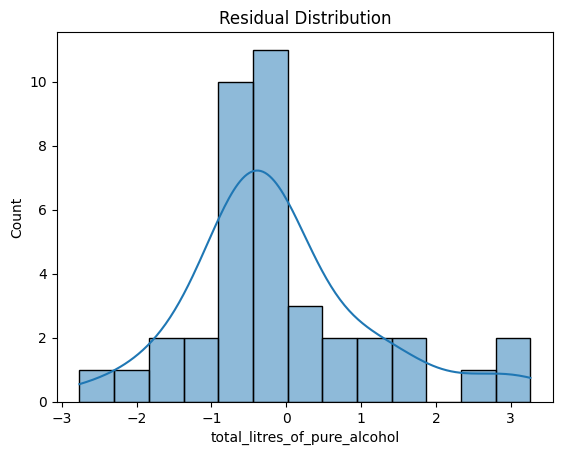

In [ ]:
# Residual Evaluation

residuals= y_test - y_pred

sns.histplot(residuals, kde= True)
plt.title('Residual Distribution')
plt.show()

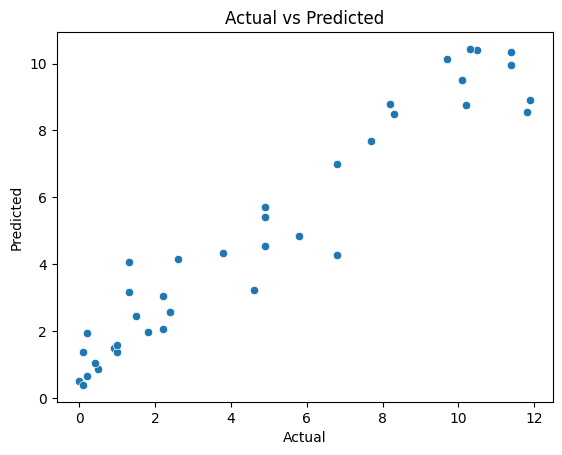

In [ ]:
# Scatter plot

sns.scatterplot(x= y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [ ]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [ ]:
from google.colab import files
df.to_csv('beer_servings_for_model.csv', index= False)